# Quickstart - Python code

sample codes for handling files, HTTP request, image, video and mouse control

In [1]:
import os
import time
import datetime

### Time

In [2]:
# measure time
start_time = time.time()

# ... process code ...

print("processed time: {:.2f} sec".format(time.time() - start_time))

processed time: 0.00 sec


In [3]:
#https://docs.python.org/2/library/time.html
# print date

print(datetime.datetime.now().strftime("%y-%m-%d"))
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S %p"))

18-07-16
2018-07-16 02:06:20 AM


### Files handling

In [4]:
dirpath = "assets/sample"
# create directory
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
else:
    print("dir already exist")

dir already exist


In [5]:
# browse directory
for f in os.listdir(dirpath):
    if os.path.isdir(os.path.join(dirpath, f)):
        continue

    filename = os.path.splitext(f)[0]
    ext = os.path.splitext(f)[1] 
    print(filename, ext)

IMG_0263-face0 .JPG
faces .jpg
happy .jpg


In [6]:
# wirte a file
dirpath = "assets"
with open(os.path.join(dirpath, 'test.txt'), 'w') as file:
    file.write("test file\nhello world\nI love python")

In [7]:
# read a file
with open(os.path.join(dirpath, 'test.txt'), 'r') as f:
    for line in f:
        print(line)

test file

hello world

I love python


### Image Handling

Referece: http://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

In [8]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
# read image file
testimg = 'assets/sample/IMG_0263-face0.JPG'
img = cv2.imread(testimg, cv2.IMREAD_COLOR)

In [10]:
# image resize
# http://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html
# upsizing: cv2.INTER_CUBIC, downsize: cv2.INTER_AREA
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)

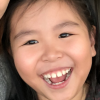

In [11]:
# display using PIL - need to convert
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pilimg = Image.fromarray(img)
display(pilimg)

(-0.5, 737.5, 737.5, -0.5)

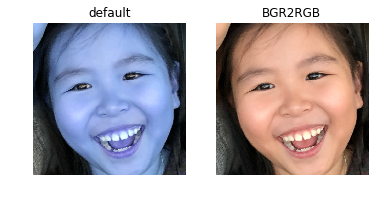

In [12]:
img = cv2.imread(testimg, cv2.IMREAD_COLOR)

# display using PLT - 1x2 display format
fig=plt.figure()

fig.add_subplot(121)
plt.imshow(img)
plt.title('default')
plt.axis('off')

# convert to RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(122)
plt.imshow(img2)
plt.title('BGR2RGB')
plt.axis('off')

### Http handling

Reference: http://docs.python-requests.org/en/master/user/quickstart/

In [13]:
import requests
import http

import json
from io import BytesIO
import numpy as np

In [14]:
# simple http GET request
test_url = "http://ipinfo.io/ip"
r = requests.get(test_url)
print(r.text)
print(r.content) # binary

13.66.244.34

b'13.66.244.34\n'


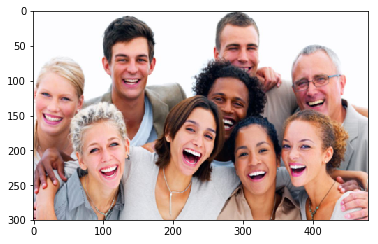

In [15]:
# http GET request - binary
test_url = "http://epilepsyu.com/wp-content/uploads/2014/01/happy-people-1050x600.jpg"
r = requests.get(test_url)

img = Image.open(BytesIO(r.content))
rsimg = cv2.resize(np.array(img), (480, 300), interpolation = cv2.INTER_AREA)
plt.imshow(rsimg)

In [16]:
# update myconfig.py
import myconfig
#print(myconfig.api_id, myconfig.api_key)

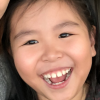

label: hsp, confidence: 75.28%


In [17]:
# http POST request with binary data - Azure custom.ai prediction api
testimg = 'assets/sample/IMG_0263-face0.JPG'

img = cv2.imread(testimg, cv2.IMREAD_COLOR)
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pilimg = Image.fromarray(img)
display(pilimg)

apiurl = 'https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/%s/image'
headers = {"Content-Type": "application/octet-stream", "Prediction-Key": myconfig.api_key }

with open(testimg, 'rb') as roi:
    r = requests.post(apiurl % myconfig.api_id, headers=headers, data=roi)
    
    #print(r.text)
    
    # JSON parse
    pred = json.loads(r.content.decode("utf-8"))

    conf = float(pred['predictions'][0]['probability'])
    label = pred['predictions'][0]['tagName']
    
    print("label: {}, confidence: {:.2f}%".format(label, conf*100))

### Video Handeling

__NOT WORKING ON REMOTE CONNECTION__

Reference: http://opencv-python.readthedocs.io/en/latest/doc/02.videoStart/videoStart.html

In [ ]:
### capture camera
cap = cv2.VideoCapture(0)
print('width: {0}, height: {1}'.format(cap.get(3),cap.get(4)))
cap.set(3,320)
cap.set(4,240)

while(True):
    ret, frame = cap.read()

    if (ret):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame', gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
### play video file
cap = cv2.VideoCapture('assets/ssd/sample3.mp4')
print(cap.get(3), cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()

    if not ret:
        break;
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    f = cv2.resize(frame, (480, 300), interpolation =cv2.INTER_AREA)
    cv2.imshow('frame',f)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Mouse control

__NOT WORKING ON REMOTE CONNECTION__

Reference: http://opencv-python.readthedocs.io/en/latest/doc/04.drawWithMouse/drawWithMouse.html

In [ ]:
drawing = False # true if mouse is pressed
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),7,(255, 255, 255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(img,(x,y),7,(255, 255, 255),-1)

#
img = np.full((240, 240, 3), 0, np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break

cv2.destroyAllWindows()

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dimg = cv2.resize(gray_image, (28, 28), interpolation = cv2.INTER_AREA)
testx = dimg.astype(np.float32)
plt.imshow(dimg, cmap="gray_r")